In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from src.utils.datasets.ggimages import OpenImage
from src.utils.datasets.transform import RandomHorizontalFlip, Resize, Compose, XyToCenter
import torchvision.transforms as transforms
from src.utils.display.images import imshow, result_show
from torch.utils.data import DataLoader
from src.utils.datasets.adapter import convert_data
import numpy as np
from src.network.yolo import Yolo
from src.config import VOC_ANCHORS
from src.utils.process_boxes import preprocess_true_boxes
from src.config import IOU_THRESHOLD, TENSORBOARD_PATH
from tensorboardX import SummaryWriter
from datetime import datetime
import time
from PIL import Image


In [3]:
base_classes = ['__background__',
 '1050',
 '59055',
 '657',
 '2157',
 '1166',
 '1178',
 '9620',
 '9540',
 '2337',
 '175691',
 '34547',
 '454',
 '792',
 '82',
 '525',
 '1267',
 '9',
 '223',
 '80',
 '1185',
 '307',
 '55556',
 '5207',
 '92',
 '38',
 '728',
 '2071',
 '9769',
 '142209',
 '378423',
 '295401',
 '1176',
 '1107',
 '763',
 '73',
 '385',
 '1748',
 '260',
 '1259',
 '794',
 '2690',
 '3769',
 '248',
 '1263',
 '3478',
 '1486',
 '6007',
 '29337',
 '39310',
 '4196',
 '3788',
 '340051',
 '1668',
 '43326',
 '585',
 '1934',
 '1070',
 '677',
 '1945',
 '43',
 '2106',
 '102',
 '98',
 '72000',
 '26666',
 '121552',
 '91',
 '216',
 '220',
 '343',
 '2516',
 '200488',
 '6798',
 '280035',
 '660',
 '8455',
 '772',
 '1016',
 '1647',
 '60007',
 '1143',
 '119',
 '1077',
 '60',
 '2058',
 '313919',
 '5977',
 '1917',
 '33856',
 '6026',
 '658',
 '1041',
 '1242',
 '1088',
 '526',
 '691',
 '1895',
 '1278',
 '79880',
 '1962',
 '179593',
 '666',
 '158',
 '5191',
 '6899',
 '238',
 '2322',
 '171210',
 '4975',
 '1229',
 '36617',
 '27439',
 '333387',
 '504',
 '193',
 '87',
 '280693',
 '5543',
 '5212',
 '200',
 '752',
 '2482',
 '50',
 '936',
 '594',
 '764']

In [4]:
from src.network.base import DarkNet, DarknetBody, YoloBody

model = Yolo(VOC_ANCHORS, base_classes)
model.load_state_dict(torch.load('./save_model/voc_model_unfreeze_19.pth', map_location='cpu'))
model.cuda()

Yolo(
  (yolo_body): DataParallel(
    (module): YoloBody(
      (body_bottom): DarknetBodyBottom(
        (first_layer): Conv2d(
          (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (relu): LeakyReLU(negative_slope=0.1)
        )
        (second_layer): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (third_layer): Conv2d(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (relu): LeakyReLU(negative_slope=0.1)
        )
        (forth_layer): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (fifth_layer): BottleneckBlock(
          (first_layer): Conv2d(
            (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1),

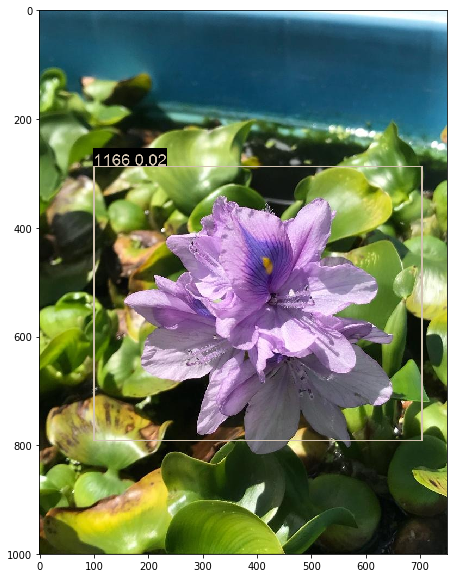

In [16]:
with torch.no_grad():
    img_path = './data/VOC_FULL/1041_output/JPEGImages/2_gs_2692172.jpg'
    img = Image.open(img_path)
    boxes, scores, classes = model.predict(img_path, score_threshold=0.01, iou_threshold=0.1)
result_show(img, boxes, classes, scores,  base_classes)